In [134]:
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt


In [135]:
data_dir = r"D:\PDP-lab\dataset"  # Replace with actual path
osteoporosis_dir = os.path.join(data_dir, "osteoporosis")
normal_dir = os.path.join(data_dir, "Normal")
osteopenia_dir = os.path.join(data_dir, "Osteophenia")

classes = ["normal", "osteopenia", "osteoporosis"]

num_normal_images = len(os.listdir(normal_dir))
num_osteopenia_images = len(os.listdir(osteopenia_dir))
num_osteoporosis_images = len(os.listdir(osteoporosis_dir))

total_images = num_normal_images + num_osteopenia_images + num_osteoporosis_images


In [136]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split 20% for validation
)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # Adjust if VGG19 requires different input size
    batch_size=32,  # Adjust batch size as needed
    class_mode="categorical",
    subset="training"
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

test_generator = test_datagen.flow_from_directory(
    data_dir,  # Replace with path to user image if using for prediction
    target_size=(224, 224),
    batch_size=1,  # Single image for prediction
    class_mode="categorical",
    shuffle=False  # Keep images in original order for prediction
)


Found 140 images belonging to 3 classes.
Found 34 images belonging to 3 classes.
Found 174 images belonging to 3 classes.


In [137]:
def remove_noise(image):
    # Apply chosen noise reduction technique here
    # Example: Median blur for salt-and-pepper noise
    image = cv2.medianBlur(image, 5)  # Adjust kernel size as needed
    return image


In [138]:
base_model = VGG19(weights="imagenet", include_top=False, input_shape=(224, 224, 3))


In [139]:
for layer in base_model.layers:
    layer.trainable = False


In [140]:
   x = base_model.output
   x = Flatten()(x)
   x = Dense(1024, activation="relu")(x)
   x = Dropout(0.5)(x)
   predictions = Dense(len(classes), activation="softmax")(x)

   model = Model(inputs=base_model.input, outputs=predictions)

   # Compile Model
   model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])



In [141]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=20,  # Adjust based on training time and accuracy
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)


Epoch 1/20


D:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.3396 - loss: 2.4193 - val_accuracy: 0.3125 - val_loss: 1.2576
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.2500 - loss: 0.8439 - val_accuracy: 0.5000 - val_loss: 1.7029
Epoch 3/20


D:\anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.3937 - loss: 2.1571 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 753ms/step - accuracy: 0.5625 - loss: 0.5426 - val_accuracy: 0.2500 - val_loss: 1.7069
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.4160 - loss: 1.5397 - val_accuracy: 0.5000 - val_loss: 1.3338
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5000 - loss: 0.6813 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.4428 - loss: 1.0467 - val_accuracy: 0.4062 - val_loss: 1.2155
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.4375 - loss: 0.7503 - val_accuracy: 0.5000 - val_loss: 1.3498
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5284 - loss: 0.8990 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 783ms/step - accuracy: 0.4062 - loss: 0.6954 - val_accuracy: 0.4062 - val_loss

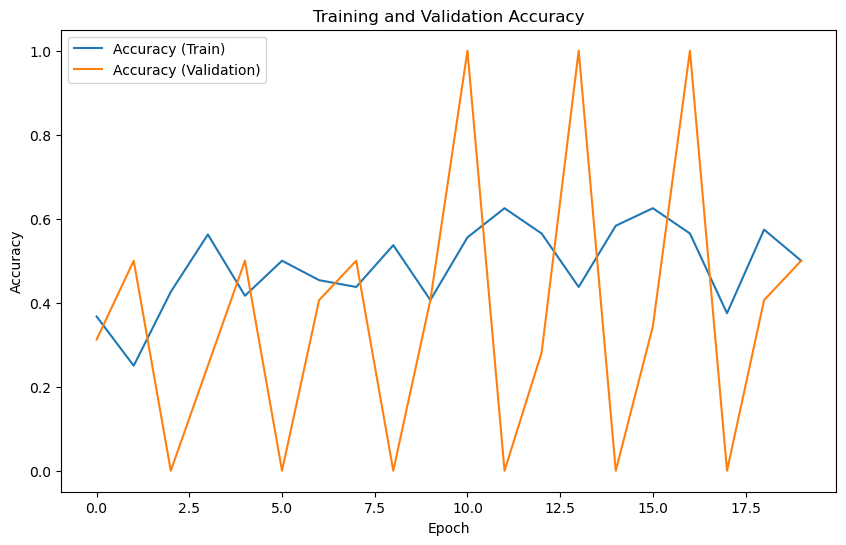

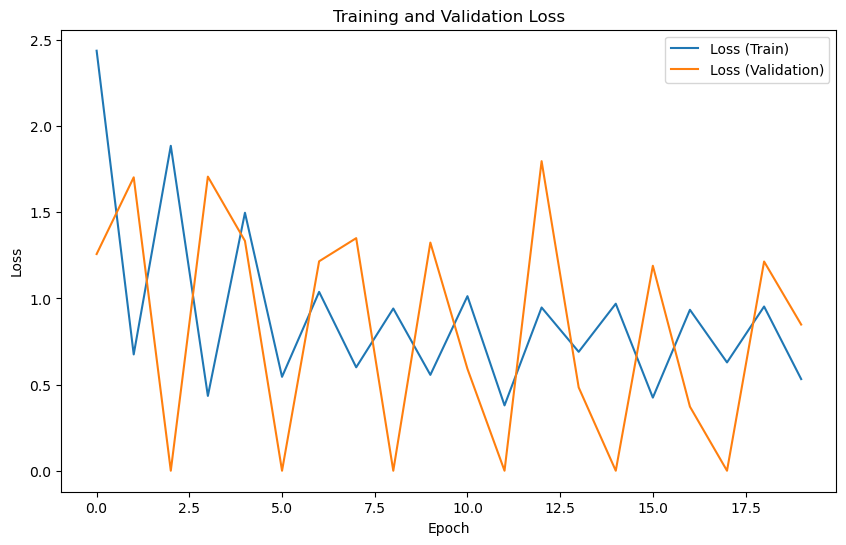

In [142]:
 plt.figure(figsize=(10, 6))

# Plot training and validation accuracy
plt.plot(history.history["accuracy"], label="Accuracy (Train)")
plt.plot(history.history["val_accuracy"], label="Accuracy (Validation)")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history["loss"], label="Loss (Train)")
plt.plot(history.history["val_loss"], label="Loss (Validation)")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()


174/174 ━━━━━━━━━━━━━━━━━━━━ 27s 153ms/step - accuracy: 0.5691 - loss: 0.9077
Test Accuracy: 0.6839080452919006
174/174 ━━━━━━━━━━━━━━━━━━━━ 30s 171ms/step
              precision    recall  f1-score   support

      normal       0.81      0.58      0.68        60
  osteopenia       0.72      0.63      0.67        60
osteoporosis       0.59      0.85      0.70        54

    accuracy                           0.68       174
   macro avg       0.71      0.69      0.68       174
weighted avg       0.71      0.68      0.68       174



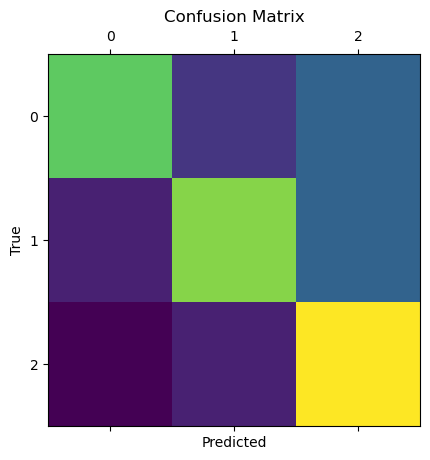

In [143]:
import numpy as np
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

# Get predictions and labels for confusion matrix and report
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)  # Get predicted class indices
y_true = test_generator.classes  # True class labels

print(classification_report(y_true, y_pred, target_names=classes))
cm = confusion_matrix(y_true, y_pred)
plt.matshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [144]:
import cv2
from skimage.restoration import inpaint_biharmonic

def preprocess_image(image, mask=None, return_grayscale=False):
    """Preprocesses an image for clarity, including label removal if applicable.

    Args:
        image: The input image as a NumPy array.
        mask: An optional binary mask (same size as image) indicating label regions to remove.
        return_grayscale: True to return the grayscale image, False for color (if applicable).

    Returns:
        The preprocessed image as a NumPy array (grayscale or color, depending on return_grayscale).
    """

    # Optional grayscale conversion (remove if not needed):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Noise reduction (choose appropriate technique):
    blur_image = cv2.medianBlur(gray_image, 5)  # Median blur

    # Label removal (if mask is provided):
    if mask is not None:
        try:
            inpainted_image = inpaint_biharmonic(blur_image, mask)
            return inpainted_image if return_grayscale else cv2.cvtColor(inpainted_image, cv2.COLOR_GRAY2BGR)
        except ValueError as e:  # Handle potential inpainting errors
            print("Inpainting failed:", e)
            return blur_image if return_grayscale else cv2.cvtColor(blur_image, cv2.COLOR_GRAY2BGR)

    return gray_image if return_grayscale else image  # Return grayscale or color, as requested


In [145]:
import cv2
# Function to resize a single image
def resize_image(input_image_path, output_image_path, target_size):
    # Read the input image
    img = cv2.imread(input_image_path) 
    # Resize the image
    resized_img = cv2.resize(img, target_size)
    # Save the resized image
    cv2.imwrite(output_image_path, resized_img)
# Specify the path to your input image
input_image_path = r"D:\9c2tz2xfyv-1\osteoporosis\Fixed image for training CNN models\osteoporosis\1.png"
# Specify the target size for resizing
target_size = (224, 224)  # Set the desired size for resizing the image
# Specify the output path for the resized image
output_image_path = "resized_image.jpg"
# Resize the input image
resize_image(input_image_path, output_image_path, target_size)
print("Resized image saved in:", output_image_path)
# user_image_path = r"D:\PDP-lab\dataset\osteoporosis\1 (1).PNG"  # Replace with actual path
user_image_path = output_image_path  # Replace with actual path
user_image = cv2.imread(user_image_path)
user_image = preprocess_image(user_image,return_grayscale=False)  # Call your preprocessing function
print(output_image_path)

Resized image saved in: resized_image.jpg
resized_image.jpg


In [146]:
print(user_image)
print(user_image.shape)

[[[243 243 243]
  [121 121 121]
  [ 63  63  63]
  ...
  [172 172 172]
  [255 255 255]
  [255 255 255]]

 [[243 243 243]
  [124 124 124]
  [ 60  60  60]
  ...
  [172 172 172]
  [254 254 254]
  [255 255 255]]

 [[239 239 239]
  [120 120 120]
  [ 53  53  53]
  ...
  [173 173 173]
  [253 253 253]
  [255 255 255]]

 ...

 [[244 244 244]
  [155 155 155]
  [107 107 107]
  ...
  [181 181 181]
  [255 255 255]
  [255 255 255]]

 [[244 244 244]
  [156 156 156]
  [117 117 117]
  ...
  [184 184 184]
  [254 254 254]
  [255 255 255]]

 [[247 247 247]
  [176 176 176]
  [143 143 143]
  ...
  [192 192 192]
  [254 254 254]
  [255 255 255]]]
(224, 224, 3)


In [147]:

# Reshape based on grayscale or color:
if len(user_image.shape) == 2:  # Grayscale
    user_image = user_image.reshape((1, user_image.shape[0], user_image.shape[1]))
elif len(user_image.shape) == 3:  # Color
    user_image = user_image.reshape((1, user_image.shape[0], user_image.shape[1], user_image.shape[2]))
else:
    raise ValueError("Unexpected image shape")


In [148]:
print(user_image.shape)

(1, 224, 224, 3)


In [149]:
from skimage import color
gray_image = color.rgb2gray(user_image)

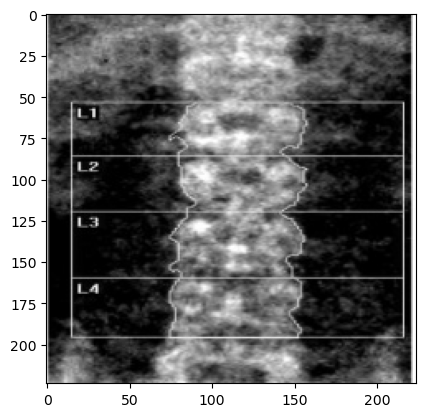

In [150]:
import matplotlib.pyplot as plt
gray_image = gray_image.squeeze()
plt.imshow(gray_image, cmap="gray")
plt.show()

In [151]:
#### import numpy as np
# Reshape for prediction (single image)
# print(user_image.shape)
# user_image = user_image.reshape((1, user_image.shape[0], user_image.shape[1], user_image.shape[2]))  # Add only a lea
user_image = user_image.reshape((1, 224, 224, 3))  # Add only a leading 1 for batch size
prediction = model.predict(user_image)
predicted_class = classes[np.argmax(prediction[0])]
predicted_prob = np.max(prediction[0])

print(f"Predicted Class: {predicted_class}")
print(f"Predicted accuracy: {predicted_prob:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
Predicted Class: osteopenia
Predicted accuracy: 1.0000


Found 140 images belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 30s 169ms/step - accuracy: 0.2356 - loss: 1.6578
Test Accuracy: 0.3448275923728943
174/174 ━━━━━━━━━━━━━━━━━━━━ 29s 167ms/step
              precision    recall  f1-score   support

      normal       0.00      0.00      0.00        60
  osteopenia       0.34      1.00      0.51        60
osteoporosis       0.00      0.00      0.00        54

    accuracy                           0.34       174
   macro avg       0.11      0.33      0.17       174
weighted avg       0.12      0.34      0.18       174



D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


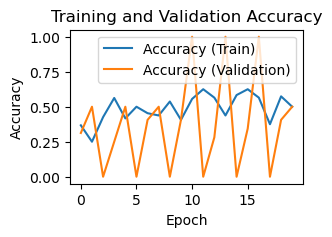

<Figure size 300x200 with 0 Axes>

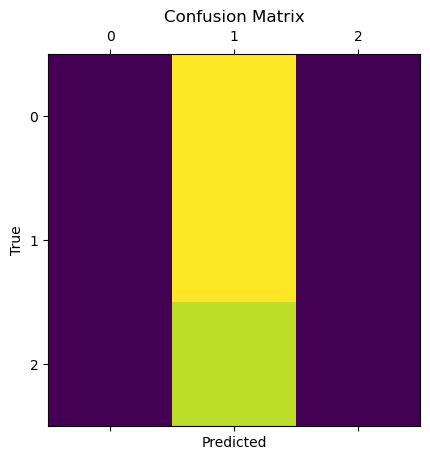

In [156]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.metrics import confusion_matrix, classification_report

# Define paths and classes
data_dir = r"D:\PDP-lab\dataset"  # Replace with actual path
osteoporosis_dir = os.path.join(data_dir, "osteoporosis")
normal_dir = os.path.join(data_dir, "Normal")
osteopenia_dir = os.path.join(data_dir, "Osteophenia")

classes = ["normal", "osteopenia", "osteoporosis"]

# Define the model architecture
base_model = VGG19(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(len(classes), activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

# Create data generators
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split 20% for validation
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

# Initialize canvas_acc, canvas_loss, and canvas_cm
canvas_acc = None
canvas_cm = None

# Check if history is available
if "history" not in globals():
    history = None

# Check if test_generator is available
if "test_generator" not in globals():
    test_generator = None

def classify_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        image = Image.open(file_path)
        image = image.resize((224, 224))  # Adjust size according to your needs
        photo = ImageTk.PhotoImage(image)
        user_image_label.config(image=photo)
        user_image_label.image = photo
        
        # Convert image to numpy array and classify
        user_image_array = np.array(image)
        user_image_array = user_image_array.reshape((1,) + user_image_array.shape)  # Add batch dimension
        prediction = model.predict(user_image_array)
        predicted_class = classes[np.argmax(prediction[0])]
        predicted_prob = np.max(prediction[0])
        
        # Display classification result horizontally
        result_label.config(text=f"Predicted Class: {predicted_class}, Predicted Accuracy: {predicted_prob:.4f}")

def show_accuracy_graph():
    global canvas_acc
    if history:
        plt.figure(figsize=(3, 2))  # Set figure size
        # Plot training and validation accuracy
        plt.plot(history.history["accuracy"], label="Accuracy (Train)")
        plt.plot(history.history["val_accuracy"], label="Accuracy (Validation)")
        plt.title("Training and Validation Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()
        
        # Create a pop-up window to display the accuracy graph
        acc_window = tk.Toplevel()
        acc_window.title("Accuracy Graph")
        acc_window.configure(bg="#1E1E1E")  # Set background color
        
        # Add accuracy graph to the pop-up window
        canvas_acc = FigureCanvasTkAgg(plt.gcf(), master=acc_window)
        canvas_acc.draw()
        canvas_acc.get_tk_widget().pack(fill=tk.BOTH, expand=True)

def show_confusion_matrix():
    global canvas_cm
    if test_generator:
        test_loss, test_acc = model.evaluate(test_generator)
        print("Test Accuracy:", test_acc)

        # Get predictions and labels for confusion matrix and report
        predictions = model.predict(test_generator)
        y_pred = np.argmax(predictions, axis=1)  # Get predicted class indices
        y_true = test_generator.classes  # True class labels

        print(classification_report(y_true, y_pred, target_names=classes))
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(3, 2))  # Set figure size
        plt.matshow(cm)
        plt.title("Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        
        # Create a pop-up window to display the confusion matrix
        cm_window = tk.Toplevel()
        cm_window.title("Confusion Matrix")
        cm_window.configure(bg="#1E1E1E")  # Set background color
        
        # Add confusion matrix to the pop-up window
        canvas_cm = FigureCanvasTkAgg(plt.gcf(), master=cm_window)
        canvas_cm.draw()
        canvas_cm.get_tk_widget().pack(fill=tk.BOTH, expand=True)

# Create the main Tkinter window
root = tk.Tk()
root.title("Image Classification")
root.configure(bg="#1E1E1E")  # Set background color

# Create Frame 1 for image and result
frame_1 = tk.Frame(root, bg="#1E1E1E")
frame_1.grid(row=0, column=0, padx=10, pady=10)

# Create a label to display user-selected image
user_image_label = tk.Label(frame_1, bg="#424242")  # Set border color for the image
user_image_label.grid(row=0, column=0, padx=10, pady=10)

# Create a button to select an image and classify
classify_button = tk.Button(frame_1, text="Select Image", command=classify_image, bg="#1976D2", fg="#FFFFFF")  # Set button color
classify_button.grid(row=1, column=0, padx=10, pady=10)

# Create a label to display classification result
result_label = tk.Label(frame_1, text="", bg="#1E1E1E", fg="#2196F3")  # Set result label color
result_label.grid(row=1, column=1, padx=10, pady=10)

# Create Frame 2 for buttons
frame_2 = tk.Frame(root, bg="#1E1E1E")
frame_2.grid(row=0, column=1, padx=10, pady=10)

# Create a button to show the accuracy graph
accuracy_button = tk.Button(frame_2, text="Show Accuracy Graph", command=show_accuracy_graph, bg="#1976D2", fg="#FFFFFF")  # Set button color
accuracy_button.grid(row=0, column=0, padx=10, pady=10)

# Create a button to show the confusion matrix
cm_button = tk.Button(frame_2, text="Show Confusion Matrix", command=show_confusion_matrix, bg="#1976D2", fg="#FFFFFF")  # Set button color
cm_button.grid(row=1, column=0, padx=10, pady=10)

# Start the Tkinter event loop
root.mainloop()
